# Reading NIH data file
This is an example implementation of reading the `nispuf14.dat` file.

In [1]:
import pandas as pd

dfAfrica = pd.read_csv("africa.csv")
dfAmericas = pd.read_csv("americas.csv")
dfEMed = pd.read_csv("mediterranean.csv")
dfEurope = pd.read_csv("europe.csv")
dfSEAsia = pd.read_csv("asia.csv")
dfWPacific = pd.read_csv("pacific.csv")

df = [dfAfrica, dfAmericas, dfEMed, dfEurope, dfSEAsia, dfWPacific]

result = pd.concat(df)

print result.head()

               GHO PUBLISHSTATE  YEAR REGION    AGEGROUP   SEX  Display Value  \
0  LIFE_0000000033    PUBLISHED  1990    AFR  AGE100PLUS  BTSX           60.0   
1  LIFE_0000000035    PUBLISHED  2013    AFR    AGE85-89  BTSX            4.1   
2  LIFE_0000000035    PUBLISHED  2000    AFR    AGE55-59  BTSX           18.8   
3  LIFE_0000000032    PUBLISHED  2012    AFR    AGE45-49  FMLE         3411.0   
4  LIFE_0000000035    PUBLISHED  1990    AFR    AGE25-29   MLE           38.8   

      Numeric  Low  High  Comments  
0    60.01235  NaN   NaN       NaN  
1     4.14085  NaN   NaN       NaN  
2    18.76440  NaN   NaN       NaN  
3  3410.96100  NaN   NaN       NaN  
4    38.79806  NaN   NaN       NaN  


We got data. Now need to fix the weird symbols in Age column.

In [2]:
def cleanData(data):
    data.AGEGROUP.replace(("AGE100PLUS", "AGE95-99", "AGE90-94", "AGE85-89", 
                             "AGE80-84", "AGE75-79", "AGE70-74", "AGE65-69", 
                             "AGE60-64", "AGE55-59", "AGE50-54", "AGE45-49", 
                             "AGE40-44", "AGE35-39", "AGE30-34", "AGE25-29", 
                             "AGE20-24", "AGE15-19", "AGE10-14", "AGE5-9", 
                             "AGE1-4", "AGELT1"), 
                          (100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 
                             45, 40, 35, 30, 25, 20, 15, 10, 5, 1, 0.5), 
                          inplace = True)
    
    data.SEX.replace(("BTSX", "FMLE", "MLE"), (2, 1, 0), inplace = True)
    
    # V not a continuous value, just for ease of referencing this column
    data.GHO.replace(("LIFE_0000000029", "LIFE_0000000030", "LIFE_0000000031", 
                      "LIFE_0000000032", "LIFE_0000000033", "LIFE_0000000034",
                      "LIFE_0000000035"),
                     (29, 30, 31, 32, 33, 34, 35), inplace = True)
    
    data.drop(["PUBLISHSTATE", "Low", "High", "Comments", "Display Value"], 
              inplace = True, axis = 1)

Meanings of values in GHO column:

29  nMx - age-specific death rate between ages x and x+n

30  nqx - probability of dying between ages x and x+n

31  lx - number of people left alive at age x

32  ndx - number of people dying between ages x and x+n

33  nLx - person-years lived between ages x and x+n

34  Tx - person-years lived above age x

35  ex - expectation of life at age x

In [3]:
cleanData(result)
print result.head()

   GHO  YEAR REGION  AGEGROUP  SEX     Numeric
0   33  1990    AFR       100    2    60.01235
1   35  2013    AFR        85    2     4.14085
2   35  2000    AFR        55    2    18.76440
3   32  2012    AFR        45    1  3410.96100
4   35  1990    AFR        25    0    38.79806


Now let's graph some stuff.

In [4]:
import matplotlib as mpl
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Mackenzie is interested in trends across years by region. Philip is interested in comparing metric 31 and 32.

In [12]:
result.groupby(['GHO', 'REGION', 'YEAR', 'AGEGROUP', 'SEX']).mean()

Numeric
GHO REGION YEAR AGEGROUP SEX          
29  AFR    1990 0.5      0     0.12220
                         1     0.10310
                         2     0.11275
                1.0      0     0.02051
                         1     0.01964
                         2     0.02008
                5.0      0     0.00678
                         1     0.00657
                         2     0.00667
                10.0     0     0.00347
                         1     0.00344
                         2     0.00345
                15.0     0     0.00435
                         1     0.00388
                         2     0.00412
                20.0     0     0.00643
                         1     0.00494
                         2     0.00568
                25.0     0     0.00748
                         1     0.00618
                         2     0.00683
                30.0     0     0.00828
                         1     0.00698
                         2     0.00762
                35.0     0     0.00956
                         1     0.00801
                         2     0.00878
                40.0     0     0.01135
                         1     0.00906
                         2     0.01019
...                                ...
35  WPR    2013 55.0     0    23.19104
                         1    26.47949
                         2    24.81079
                60.0     0    19.13731
                         1    22.15896
                         2    20.64060
                65.0     0    15.42357
                         1    18.12318
                         2    16.78740
                70.0     0    12.09318
                         1    14.41054
                         2    13.29094
                75.0     0     9.21246
                         1    11.12355
                         2    10.23840
                80.0     0     6.80038
                         1     8.31782
                         2     7.66147
                85.0     0     4.97558
                         1     6.14232
                         2     5.69064
                90.0     0     3.52535
                         1     4.43578
                         2     4.13592
                95.0     0     2.75148
                         1     3.43853
                         2     3.26290
                100.0    0     2.31193
                         1     2.70181
                         2     2.63238

[11088 rows x 1 columns]

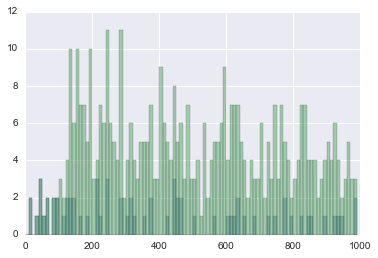

In [15]:
plt.hist(result[result.GHO == 31].Numeric, bins = np.arange(0, 1000, 10), alpha = 0.5)
plt.hist(result[result.GHO == 32].Numeric, bins = np.arange(0, 1000, 10), alpha = 0.5)
plt.show()